In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats 
from scipy import stats 
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# 1.
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# 2.
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
for col in hr.columns:
    mode = hr[col].mode()[0]
    try:
        median = hr[col].median()
    except:
        median = ''
    print(f'{col} mode - {mode}, median - {median}')

satisfaction_level mode - 0.1, median - 0.64
last_evaluation mode - 0.55, median - 0.72
number_project mode - 4, median - 4.0
average_montly_hours mode - 135, median - 200.0
time_spend_company mode - 3, median - 3.0
Work_accident mode - 0, median - 0.0
left mode - 0, median - 0.0
promotion_last_5years mode - 0, median - 0.0
department mode - sales, median - 
salary mode - low, median - 


In [6]:
# 3.
hr_int = hr.drop(['department','salary'], axis = 1)
hr_int.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [ ]:
# наиболее скоррелированы между собой: Среднее количество часов на рабочем месте в месяц и Количество проектов, 
# выполненных за время работы ( в прямой зависмости) ; r = 0.42
# наименее связаны параметры  Стаж работы в компании в годах и параметр Происходили ли несчастные случаи на рабочем месте
# с сотрудником (так же в прямой зависимости) ; r = 0.0021

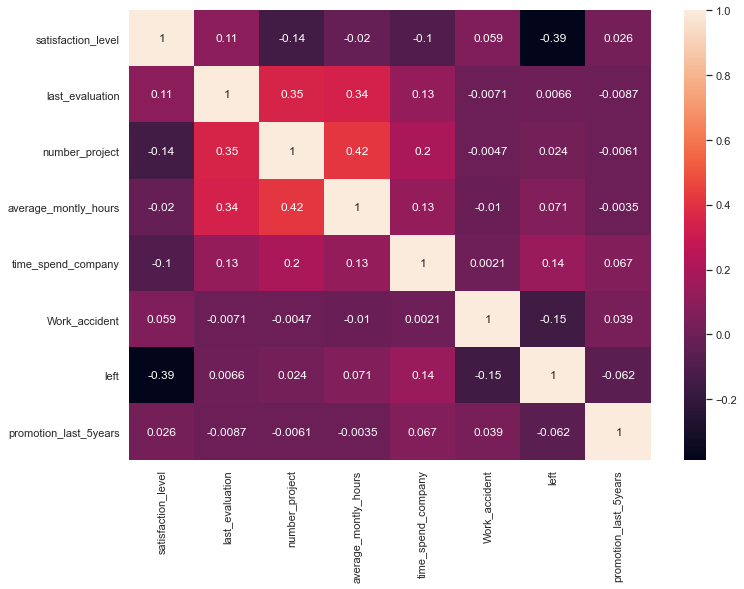

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(hr_int.corr(), annot = True)

In [9]:
# 4.
hr.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [55]:
# 5.
hr.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [76]:
# 6.
pd.pivot_table(hr[['department' ,'salary']],  index=['department'], columns=['salary'], aggfunc='size', fill_value=0)

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [10]:
# 7.
# H0: выборки сотрудников по времени на работе- с высоким окладом и с низким- идентичны.
select1 = hr[hr['salary'] == 'high']['average_montly_hours']
select2 = hr[hr['salary'] == 'low']['average_montly_hours']
select1.describe()

count    1237.000000
mean      199.867421
std        47.710446
min        96.000000
25%       161.000000
50%       199.000000
75%       241.000000
max       307.000000
Name: average_montly_hours, dtype: float64

In [11]:
select2.describe()

count    7316.000000
mean      200.996583
std        50.832214
min        96.000000
25%       155.000000
50%       199.000000
75%       246.000000
max       310.000000
Name: average_montly_hours, dtype: float64

In [97]:
stats.ttest_ind(select1, select2)

Ttest_indResult(statistic=-0.7288680398062308, pvalue=0.4661023478267259)

In [12]:
# H0  принимается -  pvalue > 0.05
# гипотезa H1: сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом - отвергается.

In [13]:
# 8.
hr_80 = hr[hr['left'] == 0]
hr_81 = hr[hr['left'] == 1]

In [119]:
# Доля сотрудников с НЕповышением за последние 5 лет среди уволившихся:
len(hr_81[hr_81['promotion_last_5years'] == 0])/len(hr_81)

0.9946793615233828

In [120]:
# Доля сотрудников с повышением за последние 5 лет среди уволившихся:
len(hr_81[hr_81['promotion_last_5years'] == 1])/len(hr_81)

0.005320638476617194

In [121]:
# Доля сотрудников с НЕповышением за последние 5 лет среди Неуволившихся:
len(hr_80[hr_80['promotion_last_5years'] == 0])/len(hr_80)

0.9737486874343717

In [122]:
# Доля сотрудников с повышением за последние 5 лет среди Неуволившихся:
len(hr_80[hr_80['promotion_last_5years'] == 1])/len(hr_80)

0.026251312565628283

In [126]:
hr_80.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


In [127]:
# Средняя степень удовлетворенности среди Неуволившихся:
hr_80.satisfaction_level.mean()

0.666809590479516

In [128]:
# Средняя степень удовлетворенности среди уволившихся:
hr_81.satisfaction_level.mean()

0.44009801176140917

In [129]:
# Среднее количество проектов среди Неуволившихся:
hr_80.number_project.mean()

3.786664333216661

In [14]:
# Среднее количество проектов среди уволившихся:
hr_81.number_project.mean()

3.8555026603192384

In [15]:
# 9.
y = hr.left
X = hr_int.drop(['left'], axis = 1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [18]:
# модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary)
lda.predict(X_test) 

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [21]:
# Repeated k-fold cross-validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lda, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   
# среднее значение точности модели по перекрестней проверке ок.76%

0.7615171002890816


In [152]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))
# средне значение около 75%

0.7533333333333333